<a href="https://colab.research.google.com/github/laracoen/MKLPM/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost scikit-learn pandas -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [1]:
!wget https://raw.githubusercontent.com/MKLPM/MKLPM/main/Anotacije.tsv

--2024-06-09 13:07:29--  https://raw.githubusercontent.com/MKLPM/MKLPM/main/Anotacije.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334400 (327K) [text/plain]
Saving to: ‘Anotacije.tsv’

Anotacije.tsv       100%[===================>] 326.56K  --.-KB/s    in 0.007s  

2024-06-09 13:07:29 (45.7 MB/s) - ‘Anotacije.tsv’ saved [334400/334400]



In [2]:
texts = []
labels = []
with open('/content/Anotacije.tsv') as input_file:
    for i, line in enumerate(input_file):
        line = line.strip()

        print(i, line, line.rsplit("\t"))

        text, label = line.split("\t")
        texts.append(text)
        labels.append(label)

        print(i, text, label)

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
451 svakako djeca nemaju što raditi bauk od ove lektire, pročita se u par sati, a najteži dio su turcizmi.	mješovito ['svakako djeca nemaju što raditi bauk od ove lektire, pročita se u par sati, a najteži dio su turcizmi.', 'mješovito']
451 svakako djeca nemaju što raditi bauk od ove lektire, pročita se u par sati, a najteži dio su turcizmi. mješovito
452 unatoč svemu rečenom, i dalje je vrijedno spomenuti djelo zbog očite dugotrajne tematizacije anti-turske tematike.	mješovito ['unatoč svemu rečenom, i dalje je vrijedno spomenuti djelo zbog očite dugotrajne tematizacije anti-turske tematike.', 'mješovito']
452 unatoč svemu rečenom, i dalje je vrijedno spomenuti djelo zbog očite dugotrajne tematizacije anti-turske tematike. mješovito
453 ova ocjena je možda iz moje agonije prema starohrvatskom i ovakvoj poeziji.	negativno ['ova ocjena je možda iz moje agonije prema starohrvatskom i ovakvoj poeziji.', 'negativno']
453 ova 

In [3]:
len(texts),len(labels)

(2951, 2951)

In [4]:
set(labels)

{'mješovito', 'negativno', 'neutralno', 'pozitivno'}

In [5]:
lower_cased_label = [x.lower() for x in labels]
lower_cased_label

['neutralno',
 'neutralno',
 'neutralno',
 'neutralno',
 'neutralno',
 'neutralno',
 'negativno',
 'negativno',
 'mješovito',
 'neutralno',
 'neutralno',
 'pozitivno',
 'neutralno',
 'negativno',
 'mješovito',
 'mješovito',
 'pozitivno',
 'pozitivno',
 'pozitivno',
 'mješovito',
 'mješovito',
 'pozitivno',
 'pozitivno',
 'neutralno',
 'neutralno',
 'pozitivno',
 'pozitivno',
 'pozitivno',
 'pozitivno',
 'negativno',
 'pozitivno',
 'pozitivno',
 'pozitivno',
 'pozitivno',
 'neutralno',
 'neutralno',
 'pozitivno',
 'pozitivno',
 'pozitivno',
 'pozitivno',
 'neutralno',
 'neutralno',
 'neutralno',
 'pozitivno',
 'neutralno',
 'neutralno',
 'neutralno',
 'pozitivno',
 'neutralno',
 'neutralno',
 'neutralno',
 'pozitivno',
 'negativno',
 'neutralno',
 'mješovito',
 'mješovito',
 'mješovito',
 'mješovito',
 'negativno',
 'neutralno',
 'pozitivno',
 'negativno',
 'pozitivno',
 'pozitivno',
 'mješovito',
 'pozitivno',
 'pozitivno',
 'neutralno',
 'pozitivno',
 'neutralno',
 'neutralno',
 'pozi

In [6]:
set(labels)

{'mješovito', 'negativno', 'neutralno', 'pozitivno'}

In [7]:
import pandas as pd

df = pd.DataFrame({"text": texts, "label": labels})

In [8]:
df["label"].value_counts()

label
neutralno    1239
pozitivno    1026
negativno     370
mješovito     316
Name: count, dtype: int64

In [9]:
df.head()

,text,label
0,malo je zastrašujuće pročitati knjigu napisanu...,neutralno
1,prijan lovro seljačko je dijete koji pokušava ...,neutralno
2,"on mora živjeti u limbu između sela i grada, i...",neutralno
3,"u terminima modernih vremena, vrlo je zabavno ...",neutralno
4,prijan lovro zapravo bi iznimno lako mogao pos...,neutralno


In [10]:
df.shape

(2951, 2)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
labels = le.transform(labels)
print(labels)

['mješovito' 'negativno' 'neutralno' 'pozitivno']
[2 2 2 ... 3 3 3]


In [12]:
set(labels)

{0, 1, 2, 3}

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

In [15]:
"Size of train:",len(texts_train), "test set", len(texts_test)

('Size of train:', 2360, 'test set', 591)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
vectorizer = TfidfVectorizer()

In [18]:
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [19]:
# Train the SVC model
model_svc = SVC()
model_svc.fit(X_train, labels_train)

SVC()

In [20]:
# Make predictions on the test set
predictions_svc = model_svc.predict(X_test)

In [22]:
# Make predictions on the test set
predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [25]:
from sklearn.metrics import accuracy_score, f1_score

In [26]:
accuracy = accuracy_score(labels_test, predictions_svc)
print("Accuracy: {:.2f}%".format(accuracy * 100))
f1 = f1_score(labels_test, predictions_svc, average='macro')
print("F1-Score: {:.2f}%".format(f1 * 100))

Accuracy: 56.01%
F1-Score: 35.83%


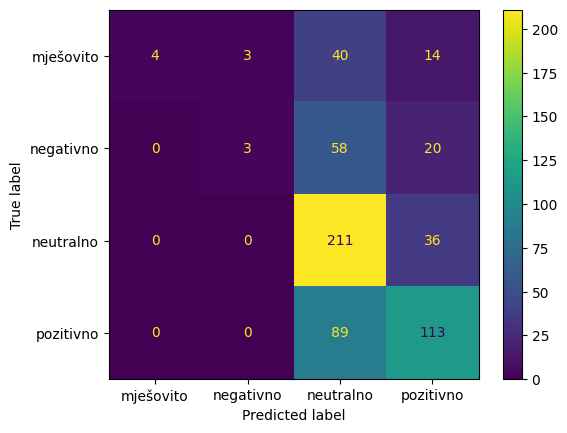

In [28]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix( labels_test, predictions_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=le.classes_)

disp.plot()


In [30]:
# Create a DataFrame with text, predictions and true labels
data = {'Text':texts_test, 'Actual-Label': labels_test, 'Predicted-Label': predictions_svc}
df_errors = pd.DataFrame(data)
print(len(df_errors))
df_errors[df_errors["Actual-Label"] != df_errors['Predicted-Label']]
# here you can see the sameples in the test set that are wrongly predicted

591


,Text,Actual-Label,Predicted-Label
2,vrlo privlačna priča o odrastanju djevojke vje...,3,2
4,koliko god shvaćam genijalnost njegove karakte...,0,3
6,zajedno čine cjelinu koja je poprilično skladna.,3,2
12,tekst je napisan izuzetno loše.,1,3
17,ovaj je roman kao tamna čokolada najveće kvali...,0,2
...,...,...,...
585,sad su mi se svidjela samo dva; i jedva.,0,2
587,"moja perspektiva se promijenila s vremenom, al...",3,2
588,to bi vjerojatno dosta pomoglo učenicima i stu...,3,2
589,kao čitatelji svjesni smo kako nesretno lucija...,1,2
